# Moo Farms FP&A Dashboard — Python Data Prep

This notebook prepares the dataset for financial planning and analysis by transforming original Indian sales data into a U.S.-based market simulation. It includes:
- Market localization (location, brand, product renaming)
- Data cleanup and format normalization
- Export for use in Tableau dashboard development
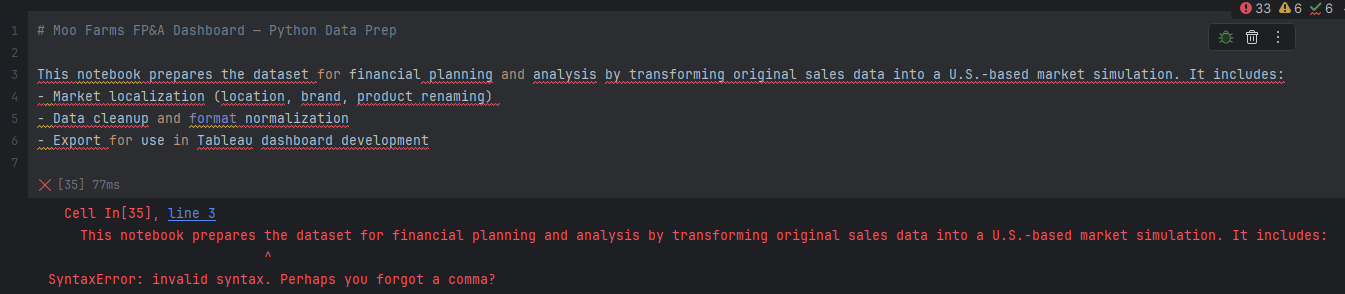

In [84]:
# Uncomment the pip install code below if you haven't installed these libraries yet
#!pip install pandas
#!pip install kaggle

import pandas as pd
import zipfile

In [85]:
#Download dataset from Kaggle using the Kaggle API
!kaggle datasets download -d suraj520/dairy-goods-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/suraj520/dairy-goods-sales-dataset
License(s): CC0-1.0
dairy-goods-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [86]:
#Extract the file from the downloaded zip file
zipfile_name = 'dairy-goods-sales-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [87]:
#Read-in the csv file as a pandas dataframe
dairy_sales_df = pd.read_csv("dairy_dataset.csv")

In [88]:
#Exporting the file to excel format
dairy_sales_df.to_excel('dairy_sales.xlsx', index=False)

#### The dataset in it's original Indian market format.

In [89]:
#Exploring the data
dairy_sales_df.head(5).style.format()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.840000,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.400000,85.720000,19064.128000,25,Frozen,2021-12-27,2022-01-21,7,82.240000,575.680000,Madhya Pradesh,Wholesale,215,19.550000,64.030000
1,Uttar Pradesh,19.190000,44,Large,2021-12-01,1,Milk,Amul,687.480000,42.610000,29293.522800,22,Tetra Pack,2021-10-03,2021-10-25,558,39.240000,21895.920000,Kerala,Wholesale,129,43.170000,181.100000
2,Tamil Nadu,581.690000,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.480000,36.500000,18377.020000,30,Refrigerated,2022-01-14,2022-02-13,256,33.810000,8655.360000,Madhya Pradesh,Online,247,15.100000,140.830000
3,Telangana,908.000000,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.360000,26.520000,21835.507200,72,Frozen,2019-05-15,2019-07-26,601,28.920000,17380.920000,Rajasthan,Online,222,74.500000,57.680000
4,Maharashtra,861.950000,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.770000,83.850000,12390.514500,11,Refrigerated,2020-10-17,2020-10-28,145,83.070000,12045.150000,Jharkhand,Retail,2,76.020000,33.400000


### Data Transformation Note

The following code block replaces clearly non-U.S. location names, brands, and product names with fictional U.S. equivalents. This adjustment is made to simulate a U.S. domestic market scenario and maintain realism for the FP&A project, even though the original dataset reflects Indian market data.

In [90]:
#Mapping Indian cities to U.S. states
state_city_mapping = {
    'Telangana': 'Texas',
    'Uttar Pradesh': 'New York',
    'Tamil Nadu': 'Arizona',
    'Maharashtra': 'Georgia',
    'Karnataka': 'Illinois',
    'Bihar': 'Ohio',
    'West Bengal': 'California',
    'Madhya Pradesh': 'Florida',
    'Chandigarh': 'Nevada',
    'Delhi': 'Pennsylvania',
    'Gujarat': 'Colorado',
    'Kerala': 'Oregon',
    'Jharkhand': 'North Carolina',
    'Rajasthan': 'Virginia',
    'Haryana': 'Washington'
}

#Mapping Indian brand names to fictional American equivalents
brand_mapping = {
    'Amul': 'Heartland Farms',
    'Mother Dairy': 'Golden Valley',
    'Raj': 'Oakridge',
    'Britannia Industries': 'Liberty Creamery',
    'Dynamix Dairies': 'Sunset Valley',
    'Sudha': 'Silver Pastures',
    'Warana': 'Hillcrest Dairy',
    'Palle2patnam': 'Harvest Ridge',
    'Parag Milk Foods': 'Morning Bell',
    'Passion Cheese': 'Everfresh Farms'
}

#Mapping Indian product names to standard U.S. dairy products
product_mapping = {
    'Paneer': 'Cottage Cheese',
    'Lassi': 'Drinkable Yogurt',
    'Ghee': 'Clarified Butter',
    'Curd': 'Yogurt',
    'Buttermilk': 'Cultured Buttermilk'
}

#Replacing column values using mapping dictionaries
dairy_sales_df['Location'] = dairy_sales_df['Location'].replace(state_city_mapping)
dairy_sales_df['Customer Location'] = dairy_sales_df['Customer Location'].replace(state_city_mapping)
dairy_sales_df['Brand'] = dairy_sales_df['Brand'].replace(brand_mapping)
dairy_sales_df['Product Name'] = dairy_sales_df['Product Name'].replace(product_mapping)

#Storing as a new cleaned dataframe
dairy_sales_us_df = dairy_sales_df

### Data Frame Changes

The following changes were applied to the dataset:

1. **Currency Format**: Ensured that all currency columns are in the correct U.S. format.
2. **Numerical Columns**: Reviewed and adjusted numerical data for consistency and accuracy.
3. **Column Names**: Updated column names for clarity and consistency.

These changes help ensure that the data aligns with U.S. standards and improves overall data quality for my analysis.

In [91]:
#Defining INR to USD conversion rate
inr_to_usd = 0.012

#Listing all currency columns for conversion
currency_columns = [
    'Approx. Total Revenue(INR)',
    'Price per Unit',
    'Price per Unit (sold)',
    'Total Value'
]

# Converting each column from INR to USD
for col in currency_columns:
    dairy_sales_us_df[col] = dairy_sales_us_df[col].astype(float) * inr_to_usd

#Renaming revenue column to reflect USD
dairy_sales_us_df.rename(columns={'Approx. Total Revenue(INR)': 'Total Revenue (USD)'}, inplace=True)

#Converting all date columns to datetime format
for col in ['Date', 'Production Date', 'Expiration Date']:
    dairy_sales_us_df[col] = pd.to_datetime(dairy_sales_us_df[col], errors='coerce')

#Formating revenue and price columns to two decimal places
dairy_sales_us_df['Total Revenue (USD)'] = dairy_sales_us_df['Total Revenue (USD)'].astype(float).round(2)
dairy_sales_us_df['Price per Unit'] = dairy_sales_us_df['Price per Unit'].astype(float).round(2)
dairy_sales_us_df['Price per Unit (sold)'] = dairy_sales_us_df['Price per Unit (sold)'].astype(float).round(2)
dairy_sales_us_df['Total Value'] = dairy_sales_us_df['Total Value'].astype(float).round(2)

In [92]:
#Reviewing the dataset changes
dairy_sales_us_df.head(5).style.format({
    'Total Revenue (USD)': '${:,.2f}',
    'Price per Unit': '${:,.2f}',
    'Price per Unit (sold)': '${:,.2f}',
    'Quantity Sold (liters/kg)': '{:,.0f}',
    'Total Value': '${:,.2f}'
})


,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Total Revenue (USD),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Texas,310.840000,96,Medium,2022-02-17 00:00:00,5,Ice Cream,Dodla Dairy,222.400000,$1.03,$228.77,25,Frozen,2021-12-27 00:00:00,2022-01-21 00:00:00,7,$0.99,$6.91,Florida,Wholesale,215,19.550000,64.030000
1,New York,19.190000,44,Large,2021-12-01 00:00:00,1,Milk,Heartland Farms,687.480000,$0.51,$351.52,22,Tetra Pack,2021-10-03 00:00:00,2021-10-25 00:00:00,558,$0.47,$262.75,Oregon,Wholesale,129,43.170000,181.100000
2,Arizona,581.690000,24,Medium,2022-02-28 00:00:00,4,Yogurt,Dodla Dairy,503.480000,$0.44,$220.52,30,Refrigerated,2022-01-14 00:00:00,2022-02-13 00:00:00,256,$0.41,$103.86,Florida,Online,247,15.100000,140.830000
3,Texas,908.000000,89,Small,2019-06-09 00:00:00,3,Cheese,Liberty Creamery,823.360000,$0.32,$262.03,72,Frozen,2019-05-15 00:00:00,2019-07-26 00:00:00,601,$0.35,$208.57,Virginia,Online,222,74.500000,57.680000
4,Georgia,861.950000,21,Medium,2020-12-14 00:00:00,8,Cultured Buttermilk,Golden Valley,147.770000,$1.01,$148.69,11,Refrigerated,2020-10-17 00:00:00,2020-10-28 00:00:00,145,$1.00,$144.54,North Carolina,Retail,2,76.020000,33.400000


In [93]:
#Export the cleaned and transformed dataframe to an Excel file for Tableau
dairy_sales_us_df.to_excel('dairy_sales_us_cleaned.xlsx', index=False, sheet_name='Data')

### Final Output

The cleaned and localized dataset was exported as `dairy_sales_us_cleaned.xlsx` and used to power the **Moo Farms FP&A Dashboard** built in Tableau Public. This dashboard visualizes key sales KPIs such as:
- Total Revenue
- Weekly Moving Averages
- Top Performing Brands
- Best and Worst-Selling Products